In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Employee.csv")

# **Data Exploration**

In [3]:
df.head(20)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [4]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [5]:
df.shape

(148, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [22]:
age_unique_values=df['Age'].unique()
print(age_unique_values)
print(f"The length of unique values in the age column are:  {len(age_unique_values)}")


[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
The length of unique values in the age column is:  30


In [21]:
print(df['Company'].unique())
print(f"The length of the unique values in the Company column are:   {len(df['Company'].unique())}")

['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
The length of the unique values in the Company column is:   7


In [23]:
print(df['Country'].unique())
print(f"The length is unique values in the  Country are : {len(df['Country'].unique())}")

['India']
The length is unique values in the  Country are : 1


In [24]:
print(df['Place'].unique())
print(f"The length is unique values in the  Country are : {len(df['Place'].unique())}")

['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
The length is unique values in the  Country are : 12


In [25]:
print(df['Salary'].unique())
print(f"The length is unique values in the  Country are : {len(df['Salary'].unique())}")

[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
The length is unique values in the  Country are : 41


# **Data Cleaning**

In [31]:
duplicated_rows=df.duplicated()
df.duplicated()

4

In [35]:
df= df.drop_duplicates()
df.duplicated().sum()

0

*  **Removed all duplicates in Dataset**

#  **Filling Null values in Age Column**

In [36]:
df['Age'].fillna(0,inplace=True)

In [37]:
df['Age'].isnull().sum()

0

*   **we have filled the null values in the age with 0**

# **Filling the null values in the Salary column**

<Axes: xlabel='Salary', ylabel='Count'>

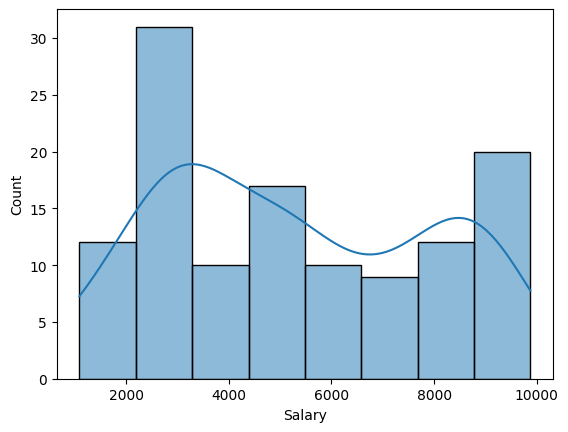

In [38]:
sns.histplot(df['Salary'],kde=True)

<Axes: ylabel='Salary'>

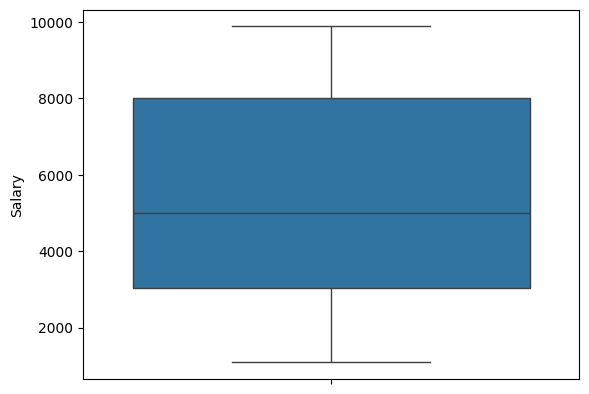

In [39]:
sns.boxplot(df['Salary'])

In [40]:
mean_salary = df['Salary'].mean()
mean_salary


5283.471074380165

In [41]:
mean_salary_formatted = "{:.0f}".format(mean_salary) + ".0"

salary_float=float(mean_salary_formatted)
salary_float

5283.0

In [42]:
df['Salary'].fillna(salary_float,inplace=True)

In [43]:
df['Salary'].isnull().sum()

0

*   **Using the Box and Histplot we have foundout that there is no outliers in the column Salary**
*   **So we  have used Mean to fill the Null values in the Salary Column**

## ***Filling the Null Values  In Column(Company)***

In [44]:
df['Company'].isnull().sum()

8

In [45]:
null_company = df[df['Company'].isnull()]

In [46]:
null_company

,Company,Age,Salary,Place,Country,Gender
37,NaN,35.0,5283.0,Hyderabad,India,0
51,NaN,24.0,3000.0,Mumbai,India,0
61,NaN,25.0,8943.0,NaN,India,1
64,NaN,25.0,6543.0,Noida,India,0
109,NaN,33.0,5283.0,Calcutta,India,0
123,NaN,0.0,3454.0,Calcutta,India,0
133,NaN,22.0,8943.0,Chennai,India,0
136,NaN,0.0,5283.0,Delhi,India,0


In [47]:
print(f"orginal dataset has total of {len(df['Place'].unique())} unique places")
print(f"The data which has null companies has total of {len(null_company['Place'].unique())} unique places  which has null companies")

orginal dataset has total of 12 unique places
The data which has null companies has total of 7 unique places  which has null companies


In [48]:
places_1 = ['Hyderabad', 'Mumbai', 'Noida', 'Calcutta', 'Chennai', 'Delhi']

In [49]:
mumbai_companies_df = df[df['Place'] =='Mumbai']

In [50]:
mumbai_companies_df['Company'].mode()

0    TCS
Name: Company, dtype: object

In [51]:
mumbai_companies_df['Company'].unique()
len(mumbai_companies_df['Company'].unique())

7

In [52]:
df.loc[df['Place'] == 'Mumbai', 'Company'] =df.loc[df['Place'] == 'Mumbai', 'Company'].fillna('TCS')


In [53]:
Hyderabad_companies_df = df[df['Place'] =='Hyderabad']

In [54]:
Hyderabad_companies_df['Company'].mode()

0        CTS
1    Infosys
Name: Company, dtype: object

In [55]:
df.loc[df['Place'] == 'Hyderabad', 'Company'] =df.loc[df['Place'] == 'Hyderabad', 'Company'].fillna('CTS')

In [56]:
# Filter DataFrame to include rows where 'Place' is 'Noida'
Noida_companies_df = df[df['Place'] =='Noida']


In [57]:
Noida_companies_df['Company'].mode()

0    TCS
Name: Company, dtype: object

In [58]:
df.loc[df['Place'] == 'Noida', 'Company'] =df.loc[df['Place'] == 'Noida', 'Company'].fillna('TCS')

In [59]:
# Filter DataFrame to include rows where 'Place' is 'Calcutta'
Calcutta_companies_df = df[df['Place'] =='Calcutta']

Calcutta_companies_df['Company'].mode()

0    TCS
Name: Company, dtype: object

In [60]:
df.loc[df['Place'] == 'Calcutta', 'Company'] =df.loc[df['Place'] == 'Calcutta', 'Company'].fillna('TCS')

In [61]:
Chennai_companies_df = df[df['Place'] =='Chennai']
Chennai_companies_df['Company'].mode()

0    TCS
Name: Company, dtype: object

In [62]:
df.loc[df['Place'] == 'Chennai', 'Company'] =df.loc[df['Place'] == 'Chennai', 'Company'].fillna('TCS')

In [63]:
Delhi_companies_df = df[df['Place'] =='Delhi']
Delhi_companies_df['Company'].mode()

0    Infosys
Name: Company, dtype: object

In [64]:
df.loc[df['Place'] == 'Delhi', 'Company'] =df.loc[df['Place'] == 'Delhi', 'Company'].fillna('Infosys')

In [65]:
null_company1 = df[df['Company'].isnull()]

In [66]:
null_company1

,Company,Age,Salary,Place,Country,Gender
61,NaN,25.0,8943.0,NaN,India,1


* **1. Firstly, we filter the dataset to include only the rows where the Company column is null.**
* **2. Next, within this filtered dataset, we identify the unique places where the Company name is null.**
* **3. Subsequently, we filter the main dataset based on these identified places and extract the mode of the Company column for each corresponding place**.
* **4. With the obtained modes, we proceed to fill the null values in the Company column with the respective mode for each corresponding place. For instance, if we filter the dataset using the place 'Delhi' and find the mode of the Company column to be 'Infosys,' we then replace the null values in the Company column where the corresponding place is 'Delhi' with 'Infosys'.**



## ***Filling the Null Values  In Column(Place)***

In [67]:
df['Place'].isnull().sum()

14

In [68]:
mode_place = df['Place'].mode()
mode_place

0    Mumbai
Name: Place, dtype: object

In [69]:
null_place = df[df['Place'].isnull()]

In [70]:
null_place

,Company,Age,Salary,Place,Country,Gender
33,TCS,36.0,5034.0,NaN,India,0
34,Infosys,26.0,8202.0,NaN,India,0
35,TCS,35.0,9024.0,NaN,India,1
41,Infosys,0.0,5000.0,NaN,India,0
42,TCS,0.0,6000.0,NaN,India,0
43,Infosys,25.0,7000.0,NaN,India,0
61,NaN,25.0,8943.0,NaN,India,1
62,Tata Consultancy Services,36.0,8345.0,NaN,India,1
63,CTS,41.0,9284.0,NaN,India,1
116,TCS,33.0,8787.0,NaN,India,1


In [71]:
null_place['Company'].unique()

array(['TCS', 'Infosys', nan, 'Tata Consultancy Services', 'CTS'],
      dtype=object)

In [72]:
null_place['Company'].mode()

0    TCS
Name: Company, dtype: object

In [73]:
TCS_company=df[df['Company'] == 'TCS']

In [74]:
TCS_company

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
6,TCS,0.0,6000.0,Chennai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
15,TCS,23.0,3000.0,Delhi,India,0
17,TCS,34.0,5000.0,Cochin,India,0
18,TCS,22.0,5283.0,Chennai,India,0
20,TCS,37.0,3045.0,Calcutta,India,0
22,TCS,21.0,4824.0,Mumbai,India,0


In [75]:
TCS_company['Place'].mode()

0    Calcutta
Name: Place, dtype: object

In [76]:
df['Place'].fillna('Calcutta',inplace=True)

In [77]:
df['Place'].isnull().sum()

0

# **conclusion**

*  **Filter the dataset to get records where 'Place' is null.**
*  **Calculate the mode of the 'Company' column for these filtered records.**
*  **Further filter the dataset based on the mode company obtained in step 2 ('TCS').**
*  **Calculate the mode of the 'Place' column for this subset.**
*  **Use the mode place obtained in step 4 ('Calcutta') to fill the missing values in the 'Place' column.**
              
               





*   **In summary, we tackled missing 'Place' values by following a step-by-step approach. First, we identified records with empty 'Place' entries. Then, we looked at the most common company ('TCS') among these records. Next, we focused on this group and found the most frequent place ('Calcutta'). Finally, we filled in the missing 'Place' values with 'Calcutta'. This method uses what we already know about companies and places to guess the missing ones.**

In [78]:
df['Company'].isnull().sum()

1

In [79]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5283.0,Chennai,India,0
1,Infosys,30.0,5283.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [80]:
df.isnull().sum()

Company    1
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

In [81]:
null_company3 = df[df['Company'].isnull()]

In [82]:
null_company3

,Company,Age,Salary,Place,Country,Gender
61,NaN,25.0,8943.0,Calcutta,India,1


In [83]:
df['Company'].fillna('TCS',inplace=True)

In [84]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

*  **Initially, we refrained from filling the null values in the Company column due to the simultaneous absence of data in both the Company and Place columns. However, upon resolving the null values in the Place column, we observed that the corresponding place for the null-valued Companies was 'Calcutta.' Consequently, we determined the mode of the Company column for entries with 'Calcutta' as the Place, which yielded 'TCS.' Subsequently, we filled these null values in the Company column with 'TCS.**

# **Data Analysis**

###  **Filtered  data with age >40 and salary<5000**

In [85]:
df[(df['Age']>40) & (df['Salary']<5000)]


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


#   **Count of the number of people from each place and represented it visually**

In [86]:
place_count=df['Place'].value_counts()


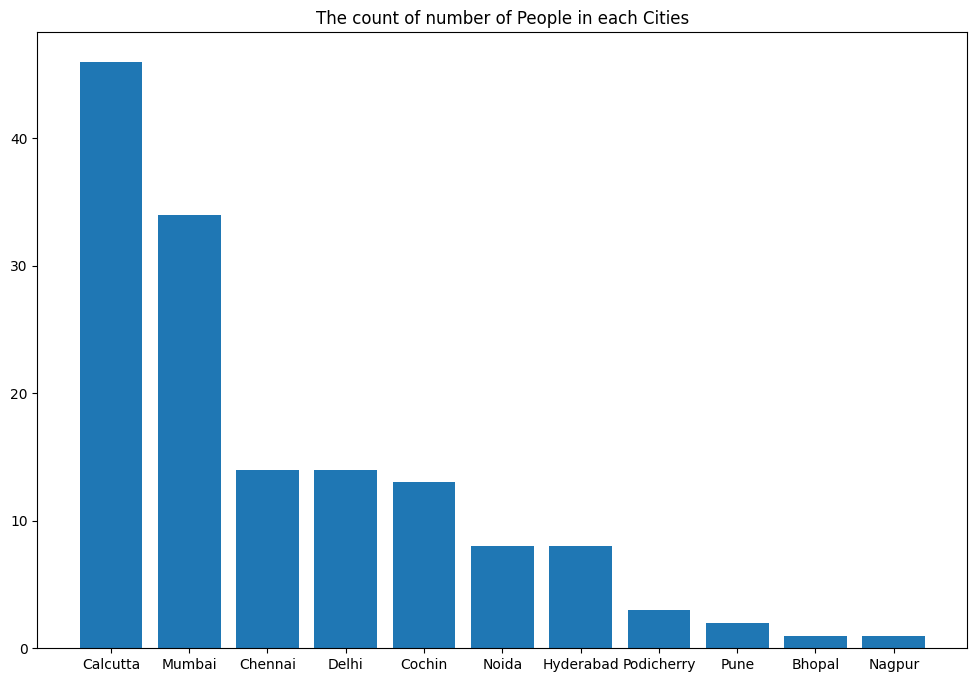

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(place_count.index,place_count)
plt.title('The count of number of People in each Cities')
plt.show()


#  **Plotting  a chart with age and salary**

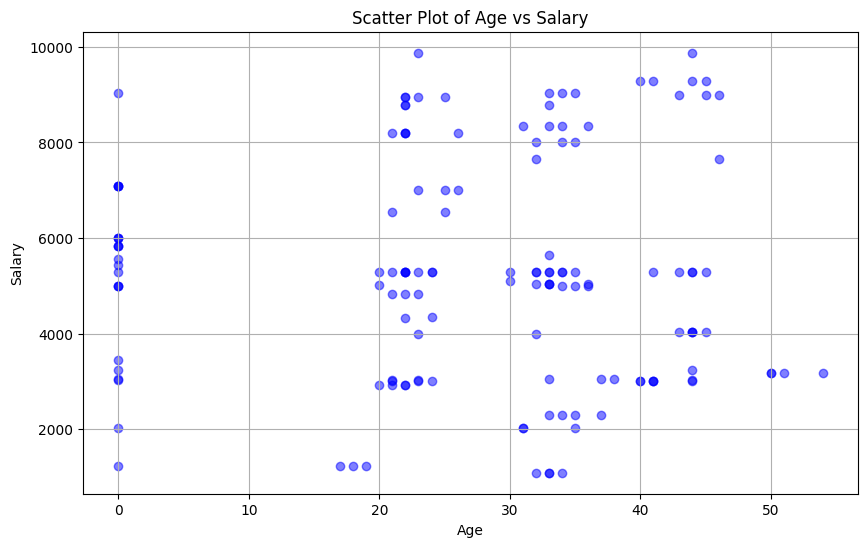

In [88]:
import matplotlib.pyplot as plt

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Salary'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


# **MinMaxScaling**

In [89]:
Q1_salary = df['Salary'].quantile(0.25)
Q3_salary =df['Salary'].quantile(0.75)
print(f"Q1 : {Q1_salary}")
print(f"Q1 : {Q3_salary}")

Q1 : 3045.0
Q1 : 7084.0


In [90]:
IQR_salary = Q3_salary  - Q1_salary
IQR_salary

4039.0

In [91]:
upper_whisker =  Q3_salary +(1.5 * IQR_salary)
lower_whisker = Q1_salary -(1.5 * IQR_salary)
upper_whisker,lower_whisker

(13142.5, -3013.5)

In [92]:
outliers_in_salary=df.loc[(df['Salary'] > lower_whisker) & (df['Salary'] < upper_whisker)]
print('The length of the The values above and below the upper and lower wisker',len(outliers_in_salary))
print('Length of old dataset is:',len(df['Salary']))

The length of the The values above and below the upper and lower wisker 144
Length of old dataset is: 144


*  **Using the IQR method we can see that there is no outliers in the column Salary**

In [93]:
Q1_age = df['Age'].quantile(0.25)
Q3_age =df['Age'].quantile(0.75)
print(f"Q1 : {Q1_age}")
print(f"Q1 : {Q3_age}")

Q1 : 21.75
Q1 : 36.0


In [94]:
IQR_age = Q3_age  - Q1_age
IQR_age

14.25

In [95]:
upper_whisker_age =  Q3_age +(1.5 * IQR_age)
lower_whisker_age = Q1_age -(1.5 * IQR_age)
upper_whisker_age,lower_whisker_age


(57.375, 0.375)

In [96]:
outliers_in_age=df.loc[(df['Age'] > lower_whisker_age) & (df['Age'] < upper_whisker_age)]
print('The length of the The values above and below the upper and lower wisker',len(outliers_in_age))
print('Length of old dataset is:',len(df['Age']))

The length of the The values above and below the upper and lower wisker 121
Length of old dataset is: 144


*  **There is no outliers in the age column,there is no significant deviation in the age of employees working in  different average age is same for every employees**

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
columns_to_scale = ['Age' ,'Salary']
df['Age'].dtype



dtype('float64')

In [98]:
df['Age']=scaler.fit_transform(df['Age'].array.reshape(-1, 1))

In [99]:
df['Salary']=scaler.fit_transform(df['Salary'].array.reshape(-1, 1))

## **scaling the columns(Age and Salary) using MinMax Scaler**

 *   **We decided to use Min-Max Scaling for the Age and Salary columns in our dataset. After conducting a thorough analysis, we found that both columns exhibited no outliers, as verified through statistical summary, box plot visualization, and the Interquartile Range (IQR) method. With the absence of outliers, Min-Max Scaling was deemed appropriate. This scaling method ensures that the Age and Salary features are scaled to a fixed range (usually 0 to 1), preserving the relationships between data points while accommodating the entire range of values in the dataset. By using Min-Max Scaling, we were able to standardize the features for further analysis and modeling, ensuring that they were on a comparable scale without distortion**

# **one Hot-Encoding**

In [100]:
encoded_data = pd.get_dummies(df[['Company', 'Place', 'Country']])


In [101]:
encoded_data=encoded_data.astype(int)
encoded_data

,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
143,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
145,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
146,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [102]:
df= pd.concat([df,encoded_data],axis=1)

In [103]:
df

,Company,Age,Salary,Place,Country,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,TCS,0.370370,0.477296,Chennai,India,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,Infosys,0.555556,0.477296,Mumbai,India,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,TCS,0.648148,0.137817,Calcutta,India,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Infosys,0.740741,0.217480,Delhi,India,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,TCS,0.425926,0.331285,Mumbai,India,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Infosys Pvt Lmt,0.407407,0.809491,Mumbai,India,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
143,TCS,0.611111,0.903039,Calcutta,India,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
145,Infosys,0.814815,0.335154,Delhi,India,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
146,TCS,0.611111,0.448959,Mumbai,India,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [104]:
df.drop(['Company','Place','Country'],axis=1,inplace=True)

In [105]:
df

,Age,Salary,Gender,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,...,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India
0,0.370370,0.477296,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.555556,0.477296,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.648148,0.137817,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.740741,0.217480,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.425926,0.331285,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.407407,0.809491,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
143,0.611111,0.903039,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
145,0.814815,0.335154,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
146,0.611111,0.448959,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


*   **In the quest for actionable insights from data, transforming categorical variables into a numerical format is essential for machine learning readiness. Leveraging pandas in Python, we applied one-hot encoding to convert categorical variables—'Company,' 'Place,' and 'Country'—into binary features. These features were seamlessly integrated into the dataset, aligning it perfectly with machine learning algorithms' requirements. By optimizing the dataset through integer conversion and column dropping, we paved the way for deeper insights and predictive capabilities, propelling data-driven innovation forward**.